# Clustering

이해원

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [103]:
pd.set_option('display.max_columns', None)
fin = pd.read_csv('final_enco_업권분류_파생변수.csv')

# 1. 총지급 건수 != 0

In [105]:
fin_only0 = fin[fin['총지급 건수'] != 0]

In [106]:
fin_only0

,Unnamed: 0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
8,8,797509,9351218,1,3,3,1,2,60,2,20,59.0,1,1,1,1,190,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,2.0,1.0,2.0,0.50,1.00,1.0,100.0
33,34,305755,9817732,2,5,3,1,6,37,2,20,37.0,1,1,1,0,4907,13,0,0,0,0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,14.0,7.0,2.0,0.50,0.14,5.0,100.0
41,42,1276659,3120785,2,4,2,1,3,85,2,20,85.0,1,1,1,0,1160,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.00,0.00,2.0,100.0
42,43,386101,236281,1,5,2,1,1,62,2,10,62.0,0,1,1,0,520,2,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,8.0,3.0,0.0,0.38,0.00,2.0,100.0
50,51,818304,5686072,1,4,2,1,1,120,2,63,120.0,1,1,1,1,989,9,0,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,5.0,2.0,0.0,0.40,0.00,6.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57349,58279,466722,8793662,1,3,6,4,1,370,1,0,370.0,1,0,0,0,1390,2,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,3.0,1.0,0.0,0.33,0.00,2.0,100.0
57359,58290,609264,927552,1,4,6,4,2,1000,1,0,1000.0,1,0,0,0,141,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,4.0,0.0,0.0,0.00,0.00,2.0,100.0
57364,58296,620311,1638299,1,2,6,4,7,320,1,0,320.0,1,0,0,1,53,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,2.0,0.0,0.0,0.00,0.00,2.0,100.0
57371,58303,665488,1893752,1,4,6,1,1,860,1,0,910.0,1,0,0,0,150,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,8.0,0.0,1.0,0.00,0.12,3.0,100.0


In [107]:
fin_only0.columns

Index(['Unnamed: 0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3',
       '연령대_4', '연령대_5', '연령대_6', '연령대_7', '연령대_8', '보험종류_1', '보험종류_2',
       '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9',
       '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4',
       '채널_5', '채널_6', '채널_7', '채널_99', '납입주기_1', '납입주기_2', '납입주기_3',
       '납입주기_99', '성별_1', '성별_2', '업권', '보험계약건수', '해지건수', '만기건수', '해지율', '만기율',
       '청구건수', '계약유지율'],
      dtype='object')

# 2. 드랍 컬럼

In [108]:
drop_col = ['Unnamed: 0', 'JOIN_SN', 'POL_SN', 'CT_CHNL_CD',
            'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
            'CT_PY_AMT',
            '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
            '연령대_7', '연령대_8', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물',
            '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99',
            '성별_1', '성별_2', '보험종류_1', '보험종류_2',
            '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9',
            '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99']

fin_only0 = fin_only0.drop(columns=drop_col).reset_index(drop=True)
fin_only0.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
0,1,3,2,20,59.0,1,1,1,1,190,1,1,2.0,1.0,2.0,0.50,1.00,1.0,100.0
1,2,5,2,20,37.0,1,1,1,0,4907,13,1,14.0,7.0,2.0,0.50,0.14,5.0,100.0
2,2,4,2,20,85.0,1,1,1,0,1160,2,1,1.0,0.0,0.0,0.00,0.00,2.0,100.0
3,1,5,2,10,62.0,0,1,1,0,520,2,0,8.0,3.0,0.0,0.38,0.00,2.0,100.0
4,1,4,2,63,120.0,1,1,1,1,989,9,1,5.0,2.0,0.0,0.40,0.00,6.0,100.0


In [77]:
fin_only0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          6064 non-null   int64  
 1   AGE_GROUP       6064 non-null   int64  
 2   CT_PY_CYCLE_CD  6064 non-null   int64  
 3   CT_PY_PD        6064 non-null   int64  
 4   mean_AMT        6064 non-null   float64
 5   GBN_CD_1        6064 non-null   int64  
 6   GBN_CD_2        6064 non-null   int64  
 7   GBN_CD_3        6064 non-null   int64  
 8   GBN_CD_4        6064 non-null   int64  
 9   업권              6064 non-null   int64  
 10  보험계약건수          6064 non-null   float64
 11  해지건수            6064 non-null   float64
 12  만기건수            6064 non-null   float64
 13  해지율             6064 non-null   float64
 14  만기율             6064 non-null   float64
 15  청구건수            6064 non-null   float64
 16  계약유지율           6064 non-null   float64
dtypes: float64(8), int64(9)
memory us

# 3. KMeans

In [109]:
k = 5
kmeans_only0_1 = KMeans(n_clusters=k, random_state=42)
kmeans_only0_1.fit(fin_only0)

fin_only0['군집'] = kmeans_only0_1.labels_
fin_only0.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율,군집
0,1,3,2,20,59.0,1,1,1,1,190,1,1,2.0,1.0,2.0,0.50,1.00,1.0,100.0,0
1,2,5,2,20,37.0,1,1,1,0,4907,13,1,14.0,7.0,2.0,0.50,0.14,5.0,100.0,3
2,2,4,2,20,85.0,1,1,1,0,1160,2,1,1.0,0.0,0.0,0.00,0.00,2.0,100.0,0
3,1,5,2,10,62.0,0,1,1,0,520,2,0,8.0,3.0,0.0,0.38,0.00,2.0,100.0,0
4,1,4,2,63,120.0,1,1,1,1,989,9,1,5.0,2.0,0.0,0.40,0.00,6.0,100.0,0


# 4. 코사인 유사도

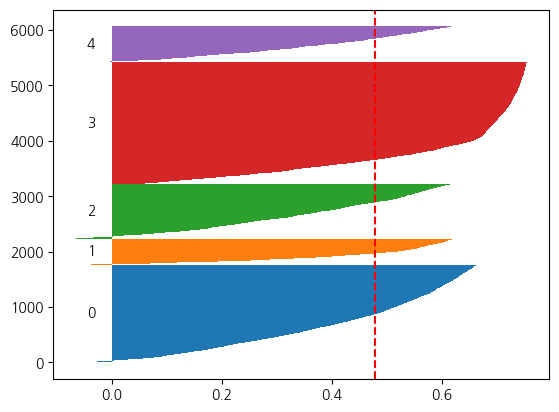

In [110]:
cosine_sim_only0_1 = cosine_similarity(fin_only0)

k=5

fig, ax = plt.subplots(1, 1)
kmeans_0_1 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only0_1)
silhouette_vals = silhouette_samples(cosine_sim_only0_1, kmeans_0_1.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_0_1.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_0_1.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)
    
ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

In [111]:
fin_only0['코사인군집'] = kmeans_0_1.labels_
fin_only0 = fin_only0.drop(columns='군집')
fin_only0.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율,코사인군집
0,1,3,2,20,59.0,1,1,1,1,190,1,1,2.0,1.0,2.0,0.50,1.00,1.0,100.0,0
1,2,5,2,20,37.0,1,1,1,0,4907,13,1,14.0,7.0,2.0,0.50,0.14,5.0,100.0,3
2,2,4,2,20,85.0,1,1,1,0,1160,2,1,1.0,0.0,0.0,0.00,0.00,2.0,100.0,3
3,1,5,2,10,62.0,0,1,1,0,520,2,0,8.0,3.0,0.0,0.38,0.00,2.0,100.0,3
4,1,4,2,63,120.0,1,1,1,1,989,9,1,5.0,2.0,0.0,0.40,0.00,6.0,100.0,3


# 5. RF - Feature Importance

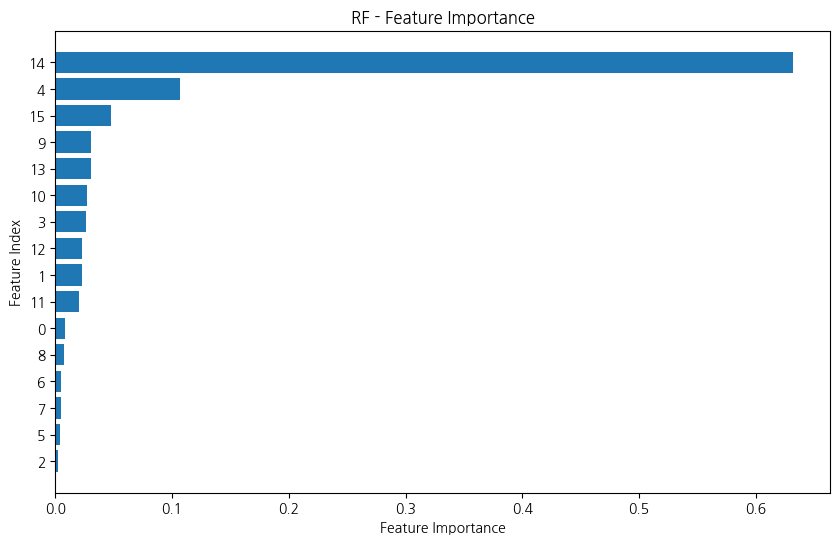

In [112]:
model_rf = RandomForestClassifier()

X_features = ['GENDER', 'AGE_GROUP', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', # 0 1 2 3 4
              'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4', '보험계약건수', '해지율', '만기율', # 5 6 7 8 9 10 11 
              '청구건수', '계약유지율', '총지급금액', '총지급 건수'] # 12 13 14 15 

x = fin_only0[X_features]
y = fin_only0['코사인군집']

model_rf.fit(x, y)

# 특성 중요도 추출
feature_importance = model_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(range(x.shape[1]))[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('RF - Feature Importance')
plt.show()

# 6. 회귀분석

## 6-1. '총지급금액', 'mean_AMT', '총지급 건수'

In [113]:
# 다중로지스틱회귀

X = fin_only0[['총지급금액', 'mean_AMT', '총지급 건수']]
y = fin_only0['코사인군집']

model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X, y)

acc_X = model_logistic.score(X, y)

# 학습된 모델의 계수 확인
lor_coef = model_logistic.coef_[0]
lor_intercept = model_logistic.intercept_

# 변수 지정
w1_lor = lor_coef[0].round(2)
w2_lor = lor_coef[1].round(2)
w3_lor = lor_coef[2].round(2)
bias_lor = lor_intercept[0].round(2)

print(w1_lor, w2_lor, w3_lor, bias_lor)
print("총지급금액 *", w1_lor, "+", "mean_AMT *", w2_lor, "+", "총지급 건수 *", w3_lor, "+", bias_lor)
print("정확도:", acc_X)

0.05 -0.05 -0.82 0.1
총지급금액 * 0.05 + mean_AMT * -0.05 + 총지급 건수 * -0.82 + 0.1
정확도: 0.7824868073878628


C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6-2. '총지급금액', 'mean_AMT', '총지급 건수', '보험계약건수'

In [114]:
# 다중로지스틱회귀

X = fin_only0[['총지급금액', 'mean_AMT', '총지급 건수', '보험계약건수']]
y = fin_only0['코사인군집']

model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X, y)

acc_X = model_logistic.score(X, y)

# 학습된 모델의 계수 확인
lor_coef = model_logistic.coef_[0]
lor_intercept = model_logistic.intercept_

# 변수 지정
w1_lor = lor_coef[0].round(2)
w2_lor = lor_coef[1].round(2)
w3_lor = lor_coef[2].round(2)
w4_lor = lor_coef[3].round(2)
bias_lor = lor_intercept[0].round(2)

print(w1_lor, w2_lor, w3_lor, w4_lor, bias_lor)
print("총지급금액 *", w1_lor, "+", "mean_AMT *", w2_lor, "+", "총지급 건수 *", w3_lor, "+", "보험계약건수 *", w4_lor, "+", bias_lor)
print("정확도:", acc_X)

0.06 -0.04 -0.02 -0.21 0.01
총지급금액 * 0.06 + mean_AMT * -0.04 + 총지급 건수 * -0.02 + 보험계약건수 * -0.21 + 0.01
정확도: 0.7885883905013192


C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6-3. '총지급금액', 'mean_AMT', '총지급 건수', '보험계약건수', '계약유지율'

In [115]:
# 다중로지스틱회귀

X = fin_only0[['총지급금액', 'mean_AMT', '총지급 건수', '보험계약건수', '계약유지율']]
y = fin_only0['코사인군집']

model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X, y)

acc_X = model_logistic.score(X, y)

# 학습된 모델의 계수 확인
lor_coef = model_logistic.coef_[0]
lor_intercept = model_logistic.intercept_

# 변수 지정
w1_lor = lor_coef[0].round(2)
w2_lor = lor_coef[1].round(2)
w3_lor = lor_coef[2].round(2)
w4_lor = lor_coef[3].round(2)
w5_lor = lor_coef[4].round(2)
bias_lor = lor_intercept[0].round(2)

print(w1_lor, w2_lor, w3_lor, w4_lor, w5_lor, bias_lor)
print("총지급금액 *", w1_lor, "+", "mean_AMT *", w2_lor, "+", "총지급 건수 *", w3_lor, "+", "보험계약건수 *", w4_lor, "+", "계약유지율 *", w5_lor, "+", bias_lor)
print("정확도:", acc_X)

0.19 -0.08 0.0 -0.08 -0.05 -0.02
총지급금액 * 0.19 + mean_AMT * -0.08 + 총지급 건수 * 0.0 + 보험계약건수 * -0.08 + 계약유지율 * -0.05 + -0.02
정확도: 0.9600923482849604


C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
# fin_only0.to_csv('코사인_업권분류X_지급건수!=0.csv')